In [1]:
!pip install tensorflow-gpu
!pip install wandb


     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 3.8MB 43.6MB/s 
     |████████████████████████████████| 450kB 63.2MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.2 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

     |████████████████████████████████| 1.3MB 10.0MB/s 
     |████████████████████████████████| 92kB 12.8MB/s 
     |████████████████████████████████| 460kB 74.3MB/s 
     |████████████████████████████████| 92kB 13.2MB/s 
     |████████████████████████████████| 256kB 69.0MB/s 
     |████████████████████████████████| 102kB 16.1MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
     |████████████████████████████████| 184kB 61.2MB/s 
  Created wheel for shortuuid: filename=shortuuid-0.5.0-cp36-none-any.whl size=5499 sha256=33548e721f4441fa9fe1da141fe372ec9cf18088fd50db9339c1a156a84e2b73
  Stored in directory: /root/.cache/pip/wheels/3f/eb/fd/69e5177f67b505e44acbd1aedfbe44b91768ee0c4cd5636576
  Created wheel for watchdog: filename=watchdog-0.9.0-cp36-none-any.whl size=73652 sha256=ed5b513f32db496c3716bfeeed1ad40ea58ae19b931a93ff9ad77544317a1024
  Stored in directory: /root/.cache/pip/wheels/61/1d/d0/04cfe495619be2095eb8d89a31c42adb4e42b76495bc8f784c
  Created wheel for gql: filena

In [0]:
import os
# os.environ["NIRAV"] = "mlclass"

In [3]:
import keras
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
import wandb
from wandb.keras import WandbCallback

run = wandb.init()
config = run.config


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [0]:
from subprocess import call
import os
from urllib.request import urlretrieve
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

dataset_url = "http://aisdatasets.informatik.uni-freiburg.de/" \
              "freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz"

def download():
    print("Downloading dataset.")
    urlretrieve(dataset_url, "freiburg_groceries_dataset.tar.gz")
    print("Extracting dataset.")
    call(["tar", "-xf", "freiburg_groceries_dataset.tar.gz", "-C", "."])
    os.remove("freiburg_groceries_dataset.tar.gz")
    print("Done.")

    
def load_data():
    if (not os.path.exists("images")):
        download()
        
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    class_names = []
    category_num = 0
    
    for category in sorted(os.listdir("images")):
        class_names.append(category)
        count = 0
        for img in sorted(os.listdir(os.path.join("images", category))):
            if (not img.endswith(".png")):
                continue
                
            x = load_img(os.path.join("images", category, img),target_size=(224, 224))
            if count < 10:
                x_test.append(img_to_array(x))
                y_test.append(category_num)
            else:
                x_train.append(img_to_array(x))
                y_train.append(category_num)
            count += 1
        category_num += 1
    return (np.array(x_train), np.array(y_train)), (np.array(x_test), np.array(y_test)), class_names

In [6]:
(x_train, y_train_raw), (x_test, y_test_raw), class_names = load_data()


Extracting dataset.
Done.


24

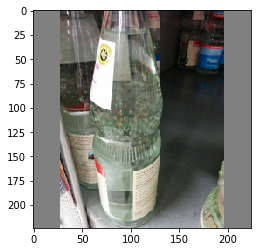

In [7]:
# take a look at the kinds of images we're dealing with
plt.imshow(x_train[-1].astype(int))
y_train_raw[-1]

(array([639., 439., 672., 199., 406., 602., 295., 504., 381., 560.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

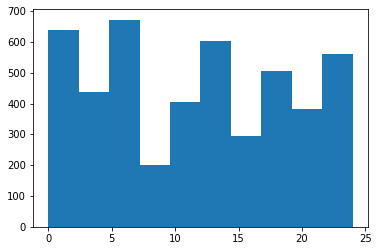

In [8]:
class_names
plt.hist(y_train_raw)


In [0]:
# One hot encode ouput
y_train = keras.utils.to_categorical(y_train_raw)
y_test = keras.utils.to_categorical(y_test_raw)

In [10]:
# We build an extremely simple perceptron to try to fit our data

x_train_normalized = x_train / 255.
x_test_normalized = x_test / 255.

very_simple_model=Sequential()
very_simple_model.add(Flatten())
very_simple_model.add(Dense(25, activation="sigmoid"))
very_simple_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# wandb.init(project="my_transfer_learn")
very_simple_model.fit(x_train_normalized, y_train, epochs=10, validation_data=(x_test_normalized, y_test), callbacks=[WandbCallback()])

Train on 4697 samples, validate on 250 samples
Epoch 1/10
4697/4697 [==============================] - 4s 794us/sample - loss: 9.3969 - accuracy: 0.0321 - val_loss: 10.0812 - val_accuracy: 0.0400
Epoch 2/10
4697/4697 [==============================] - 2s 476us/sample - loss: 9.4172 - accuracy: 0.0321 - val_loss: 10.0812 - val_accuracy: 0.0400
Epoch 3/10
4697/4697 [==============================] - 2s 436us/sample - loss: 9.4172 - accuracy: 0.0321 - val_loss: 10.0812 - val_accuracy: 0.0400
Epoch 4/10
4697/4697 [==============================] - 2s 428us/sample - loss: 9.4172 - accuracy: 0.0321 - val_loss: 10.0812 - val_accuracy: 0.0400
Epoch 5/10
4697/4697 [==============================] - 2s 430us/sample - loss: 9.4172 - accuracy: 0.0321 - val_loss: 10.0812 - val_accuracy: 0.0400
Epoch 6/10
4697/4697 [==============================] - 2s 431us/sample - loss: 9.4172 - accuracy: 0.0321 - val_loss: 10.0812 - val_accuracy: 0.0400
Epoch 7/10
4697/4697 [==============================] - 2s 

In [11]:
# Load ResNet50 Trained on imagenet
resnet_model = ResNet50(weights="imagenet")
resnet_model.summary()

102973440/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [0]:
# We should preprocess the images the same way resnet images were preprocessed
x_train_preprocessed = preprocess_input(x_train)
x_test_preprocessed = preprocess_input(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


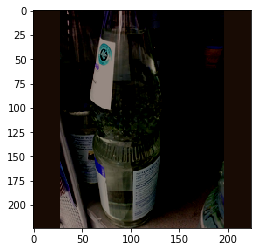

In [16]:
# plt.imshow(x_train[-1].astype(int))
plt.imshow(x_train_preprocessed[-1].astype(int))


In [19]:
# Build a new model that is ResNet50 minus the very last layer
import tensorflow
last_layer = resnet_model.get_layer("avg_pool")

resnet_layers = tensorflow.keras.Model(inputs=resnet_model.inputs, outputs=last_layer.output)
resnet_layers.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
# We use our resnet to "predict" but because we have removed the top layer, 
# this outputs the activations of the second to last layer on our dataset

x_train_features = resnet_layers.predict(x_train_preprocessed)
x_test_features = resnet_layers.predict(x_test_preprocessed)

In [21]:
feature_model=Sequential()
feature_model.add(Dense(25, activation="sigmoid"))
feature_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
feature_model.fit(x_train_features, y_train, epochs=50, validation_data=(x_test_features, y_test), callbacks=[WandbCallback()])


Train on 4697 samples, validate on 250 samples
Epoch 1/50
4697/4697 [==============================] - 1s 301us/sample - loss: 1.6689 - accuracy: 0.5007 - val_loss: 1.2485 - val_accuracy: 0.5840
Epoch 2/50
4697/4697 [==============================] - 1s 109us/sample - loss: 0.6871 - accuracy: 0.8026 - val_loss: 1.0404 - val_accuracy: 0.6640
Epoch 3/50
4697/4697 [==============================] - 0s 100us/sample - loss: 0.4631 - accuracy: 0.8767 - val_loss: 0.9484 - val_accuracy: 0.6840
Epoch 4/50
4697/4697 [==============================] - 1s 109us/sample - loss: 0.3442 - accuracy: 0.9131 - val_loss: 0.9018 - val_accuracy: 0.7440
Epoch 5/50
4697/4697 [==============================] - 0s 100us/sample - loss: 0.2558 - accuracy: 0.9421 - val_loss: 0.9161 - val_accuracy: 0.6920
Epoch 6/50
4697/4697 [==============================] - 1s 111us/sample - loss: 0.1971 - accuracy: 0.9653 - val_loss: 0.9340 - val_accuracy: 0.7280
Epoch 7/50
4697/4697 [==============================] - 0s 99us/s

In [22]:
# We can directly stich the models together

new_model=Sequential()
new_model.add(resnet_layers)
new_model.add(Dense(25, activation="sigmoid"))

new_model.layers[0].trainable=False

new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 25)                51225     
Total params: 23,638,937
Trainable params: 51,225
Non-trainable params: 23,587,712
_________________________________________________________________


In [23]:
new_model.fit(x_train_preprocessed, y_train, epochs=50, validation_data=(x_test_preprocessed, y_test), callbacks=[WandbCallback()])

Train on 4697 samples, validate on 250 samples
Epoch 1/50
4697/4697 [==============================] - 16s 3ms/sample - loss: 1.7691 - accuracy: 0.4854 - val_loss: 2.1592 - val_accuracy: 0.3760
Epoch 2/50
4697/4697 [==============================] - 11s 2ms/sample - loss: 0.7937 - accuracy: 0.7720 - val_loss: 2.0630 - val_accuracy: 0.4520
Epoch 3/50
4697/4697 [==============================] - 11s 2ms/sample - loss: 0.5594 - accuracy: 0.8484 - val_loss: 2.1606 - val_accuracy: 0.4160
Epoch 4/50
4697/4697 [==============================] - 11s 2ms/sample - loss: 0.4277 - accuracy: 0.8887 - val_loss: 2.1760 - val_accuracy: 0.4520
Epoch 5/50
4697/4697 [==============================] - 11s 2ms/sample - loss: 0.3461 - accuracy: 0.9176 - val_loss: 2.0437 - val_accuracy: 0.4880
Epoch 6/50
4697/4697 [==============================] - 11s 2ms/sample - loss: 0.2709 - accuracy: 0.9389 - val_loss: 2.0337 - val_accuracy: 0.4760
Epoch 7/50
4697/4697 [==============================] - 11s 2ms/sample 

KeyboardInterrupt: ignored

In [1]:
# We can allow some of the resnet layers to change as we train.  
# Typically you would want to lower the learning rate in conjunction with this.

new_model.layers[0].trainable = True

# We let the last 3 blocks train
for layer in new_model.layers[0].layers[:-5]:
    layer.trainable = False
for layer in new_model.layers[0].layers[-5:]:
    layer.trainable = True
    
new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
new_model.fit(x_train_preprocessed, y_train, epochs=50, validation_data=(x_test_preprocessed, y_test), callbacks=[WandbCallback()])

NameError: ignored